<a href="https://colab.research.google.com/github/veroasto/sarcasm/blob/main/All_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df2 = pd.DataFrame({'customer_id': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}, 'price': {0: 30, 1: 50, 2: 45, 3: 200, 4: 54, 5: 200}, 'quantity': {0: 2, 1: 4, 2: 3, 3: 4, 4: 2, 5: 4}, 'year': {0: '20-03-2022', 1: '21-04-2020', 2: '20-03-2020', 3: '21-04-2019', 4: '04-03-2020', 5: '15-04-2019'}})

df2

,customer_id,price,quantity,year
0,1,30,2,20-03-2022
1,2,50,4,21-04-2020
2,3,45,3,20-03-2020
3,4,200,4,21-04-2019
4,5,54,2,04-03-2020
5,6,200,4,15-04-2019


In [ ]:
# create dataframe
df = pd.DataFrame(
    [
        ['TV', '21-04-2021', 2020, 89, 8, 1, 545, 4546],
        ['WEB', '21-04-1999', 2018, 67, 2, 2, 567, 87],
        ['WEB', '21-04-1988', 2021, 673, 4, 2, 567, 87],
        ['WEB', '21-04-2000', 2021, 687, 5, 3, 567, 87],
        ['Macchina', '21-04-1999', 2020, 7, 7, 4, 545, 4546],
        ['SITO', '21-04-1993', 2019, 7, 9, 5, 545, 4546],
        ['SITO', '21-04-1992', 2020, 7, 7, 6, 545, 4546],
    ],
    columns=['Acquisition Channel', 'birth', 'date', 'num2', 'Unit', 'customer_id', 5, 6]
)
df

,Acquisition Channel,birth,date,num2,Unit,customer_id,5,6
0,TV,21-04-2021,2020,89,8,1,545,4546
1,WEB,21-04-1999,2018,67,2,2,567,87
2,WEB,21-04-1988,2021,673,4,2,567,87
3,WEB,21-04-2000,2021,687,5,3,567,87
4,Macchina,21-04-1999,2020,7,7,4,545,4546
5,SITO,21-04-1993,2019,7,9,5,545,4546
6,SITO,21-04-1992,2020,7,7,6,545,4546


In [ ]:
def relative_revenue(df,year1,year2):
    for year1 in df.date:
        revenue1 = ()
        revenue1 = (df.price*df.quantity).groupby(df.date).sum()
    for year2 in df.date:
        revenue2 = ()
        revenue2 = (df.price*df.quantity).groupby(df.date).sum()
    return((revenue1/revenue2)-1)
relative_revenue(df,"2020","2019")

date
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [ ]:
df3 = df.merge(df2, on='customer_id')
df3
df = df3

In [ ]:

from datetime import date
now = date.today()
last_month = now.month-1 if now.month > 1 else 12
last_year = now.year - 1
for i in df3['date']:
  if i == last_year:
    df3['price_per_unit'] = df3.groupby(['customer_id','Acquisition Channel'])['Unit'].nunique().sum()
  else:
    df3['price_per_unit'] = 0


In [ ]:
df3

,Acquisition Channel,birth,date,num2,Unit,customer_id,5,6,price,quantity,year,price_per_unit
0,TV,21-04-2021,2020,89,8,1,545,4546,30,2,20-03-2022,0
1,WEB,21-04-1999,2018,67,2,2,567,87,50,4,21-04-2020,0
2,WEB,21-04-1988,2021,673,4,2,567,87,50,4,21-04-2020,0
3,WEB,21-04-2000,2021,687,5,3,567,87,45,3,20-03-2020,0
4,Macchina,21-04-1999,2020,7,7,4,545,4546,200,4,21-04-2019,0
5,SITO,21-04-1993,2019,7,9,5,545,4546,54,2,04-03-2020,0
6,SITO,21-04-1992,2020,7,7,6,545,4546,200,4,15-04-2019,0


In [ ]:
import numpy as np
now = date.today()
last_year = now.year - 1
df3['lastYear'] = last_year
df3['price_per_unit'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id','Acquisition Channel', 'date'])['Unit'].nunique().sum(), np.nan)

In [ ]:
from datetime import date
df3 = df.merge(df2, on='customer_id')
df3['revenue'] = df3.price * df3.quantity
df3['birth'] = pd.to_datetime(df.date, format="%Y")
for i in df3.birth:
    m = ''
    today = date.today()
    year_age = df3['birth'].dt.year
    m = today.year - year_age
    df3['Age'] = m
#n o f distinct products by the customer last year
now = date.today()
last_year = now.year - 1
df3['lastYear'] = last_year
df3['price_per_unit'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id','Acquisition Channel', 'date'])['Unit'].nunique().sum(), 0)
#revenue
df3['revenue_previous'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id', 'date'])['revenue'].sum(), 0)
df3.drop('lastYear', axis=1, inplace=True)

    #divide into train and test
now = date.today()
last = now.year - 3
train = df3.loc[(df3['date'] >= last)]
test = df3.loc[df3['date'] <= last]
test

AttributeError: ignored

In [ ]:
df_f = df3[['revenue', 'Age', 'revenue_previous', 'price_per_unit', 'quantity', 'Unit', 'date']]

    #divide into train and test
now = date.today()
last = now.year - 3
train = df_f.loc[(df_f['date'] >= last)]
test = df_f.loc[df_f['date'] <= last]

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
   # RFC = RandomForestClassifier(n_estimators = 500, max_depth = 100)
   # RFC.fit(train, train)
   # y_pred = RFC.predict(test)
   # acc=roc_auc_score(test['revenue'],y_pred)
    #acc_log.append(acc)
  #  accuracy_score(test['revenue'], clf.predict(test[features]))
RFC = RandomForestClassifier(n_estimators = 500, max_depth = 100)
RFC.fit(train, train)
    #make an array of columns
features = df_f.columns[:2]

#build the classifier
clf = RandomForestClassifier()

#train the classifier
y = train['revenue']
clf.fit(train[features], train['revenue'])

#test the classifier
clf.predict(test[features])

#calculate accuracy
accuracy_score(test['revenue'], clf.predict(test[features]))
accuracy_score(train['revenue'], clf.predict(train[features]))

KeyError: ignored

In [ ]:
df3 = df.merge(df2, on='customer_id')
df3['revenue'] = df3.price * df3.quantity
df3['birth'] = pd.to_datetime(df.date, format="%Y")
for i in df3.birth:
   m = ''
   today = date.today()
   year_age = df3['birth'].dt.year
   m = today.year - year_age
   df3['Age'] = m
   #n o f distinct products by the customer last year
   now = date.today()
   last_year = now.year - 1
   df3['lastYear'] = last_year
   df3['price_per_unit'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id','Acquisition Channel', 'date'])['Unit'].nunique().sum(), 0)
    #revenue
   df3['revenue_previous'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id', 'date'])['revenue'].sum(), 0)
   df3.drop('lastYear', axis=1, inplace=True)


In [ ]:
def random_pro(df):
  from datetime import date
  df3 = df.merge(df2, on='customer_id')
  df3['revenue'] = df3.price * df3.quantity
  df3['birth'] = pd.to_datetime(df.date, format="%Y")
  for i in df3.birth:
    m = ''
    today = date.today()
    year_age = df3['birth'].dt.year
    m = today.year - year_age
    df3['Age'] = m
    #n o f distinct products by the customer last year
    now = date.today()
    last_year = now.year - 1
    df3['lastYear'] = last_year
    df3['price_per_unit'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id','Acquisition Channel', 'date'])['Unit'].nunique().sum(), 0)
    #revenue
    df3['revenue_previous'] = np.where((df3['date'] == df3['lastYear']), df3.groupby(['customer_id', 'date'])['revenue'].sum(), 0)
    df3.drop('lastYear', axis=1, inplace=True)

    df_f = df3[['revenue', 'Age', 'revenue_previous', 'price_per_unit', 'quantity', 'Unit', 'date']]

    #divide into train and test
    now = date.today()
    last = now.year - 3
    train = df_f.loc[(df_f['date'] >= last)]
    test = df_f.loc[df_f['date'] <= last]

    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
   # RFC = RandomForestClassifier(n_estimators = 500, max_depth = 100)
   # RFC.fit(train, train)
   # y_pred = RFC.predict(test)
   # acc=roc_auc_score(test['revenue'],y_pred)
    #acc_log.append(acc)
  #  accuracy_score(test['revenue'], clf.predict(test[features]))
    RFC = RandomForestClassifier(n_estimators = 500, max_depth = 100)
    RFC.fit(train, train)
    #make an array of columns
    features = df_f.columns[:2]

    #build the classifier
    clf = RandomForestClassifier()

    #train the classifier
    y_train = train['revenue']
    X_train = train[features]
    y_test = test['revenue']
    X_test = test[features]
    clf.fit(train[features], train['revenue'])

    #test the classifier
    clf.predict(test[features])

    #calculate accuracy
    accuracy_test = accuracy_score(test['revenue'], clf.predict(test[features]))
    accuracy_train = accuracy_score(train['revenue'], clf.predict(train[features]))

    #logistic
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(train[features], train['revenue'])
    accuracy_train2 = (logreg.score(train[features], train['revenue']))
    accuracy_test2 = (logreg.score(test[features], test['revenue']))

    #linear
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    reg = linear_model.LinearRegression()
    # train the model using the training sets
    reg.fit(X_train, y_train)
    # splitting X and y into training and testing sets
    from sklearn.model_selection import train_test_split
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)

    # create linear regression object
    reg = linear_model.LinearRegression()

    # train the model using the training sets
    reg.fit(X_train, y_train)

    # regression coefficients
    print('Coefficients: ', reg.coef_)

    # variance score: 1 means perfect prediction
    print('Variance score: {}'.format(reg.score(X_test, y_test)))

    return(accuracy_test2)



In [ ]:
import foo

ModuleNotFoundError: ignored

In [ ]:
random_pro(df)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


NameError: ignored

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

#read data into pandas dataframe
df = pd.read_csv("data.csv")

#handle missing values
df = df.dropna(axis = 0, how = 'any')

#handle string-type data
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'Sex'] = le.transform(df['Sex'])

#split into train and test data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.8
train, test = df[df['is_train'] == True], df[df['is_train'] == False]

#make an array of columns
features = df.columns[:10]

#build the classifier
clf = RandomForestClassifier()

#train the classifier
y = train['Selector']
clf.fit(train[features], train['Selector'])

#test the classifier
clf.predict(test[features])

#calculate accuracy
accuracy_score(test['Selector'], clf.predict(test[features]))
accuracy_score(train['Selector'], clf.predict(train[features]))

FileNotFoundError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train,train)
y_pre=regressor.predict(test)

In [ ]:
#median age per channel
from datetime import date
import numpy as np
def median(df):
  df['birth'] = pd.to_datetime(df['birth'])
  for i in df.birth:
    m = ''
    today = date.today()
    year_age = df['birth'].dt.year
    m = today.year - year_age
    df_m = pd.DataFrame({'Acquisition Channel': df['Acquisition Channel'], 'Median Age': m})
    #mdf_m = df_m.groupby(['Acquisition Channel'])[['Median Age']].apply(np.median)
    mdf_m = pd.DataFrame(df_m.groupby(['Acquisition Channel'])[['Median Age']].apply(np.median))
#    df_f = pd.DataFrame({'Acquisition Channel': mdf_m['Acquisition Channel'], 'Median Age': mdf_m})
   # x = pd.DataFrame(mdf_m, columns= ['Acquisition Channel', 'Median Age'])

  return mdf_m

median(df)

,0
Acquisition Channel,
Macchina,23.0
SITO,29.5
TV,1.0
WEB,23.0


In [ ]:
df['birth'] = pd.to_datetime(df['birth'])
import numpy as np
for i in df.birth:
   m = ''
   today = date.today()
   year_age = df['birth'].dt.year
   m = today.year - year_age
  # m.append(age)
df_m = pd.DataFrame({'Acquisition Channel': df['Acquisition Channel'], 'Median Age': m})
mdf_m = df_m.groupby(['Acquisition Channel'])[['Median Age']].apply(np.median)

In [ ]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
#### Calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

def calculate_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100
    return mape

In [ ]:
def regressive_model(train_data, test_data, model, model_name):

    # Call helper functions to create X & y and scale data
    X_train, y_train, X_test, y_test, scaler_object =
        scale_data(train_data, test_data)

    # Run regression model
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    # Call helper functions to undo scaling & create prediction df
    original_df = load_data('../data/monthly_data.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
    # Call helper functions to print scores and plot results
    get_scores(unscaled_df, original_df, model_name)
    plot_results(unscaled_df, original_df, model_name)

# Separate data into train and test sets
train, test = tts(model_df)
# Call model frame work for linear regression
regressive_model(train, test, LinearRegression(),'LinearRegression')
# Call model frame work for random forest regressor
regressive_model(train, test,
                 RandomForestRegressor(n_estimators=100,
                                       max_depth=20),
                                       'RandomForest')
# Call model frame work for XGBoost
regressive_model(train, test, XGBRegressor(n_estimators=100,
                                           learning_rate=0.2),
                                           'XGBoost')

In [ ]:
#To compare model performance, we will look at root mean squared error (RMSE) and mean absolute error (MAE)
def create_results_df():
    # Load pickled scores for each model
    results_dict = pickle.load(open("model_scores.p", "rb"))
    # Create pandas df
    results_df = pd.DataFrame.from_dict(results_dict,
                    orient='index', columns=['RMSE', 'MAE', 'R2'])
    results_df = results_df.sort_values(by='RMSE',
                     ascending=False).reset_index()
    return results_df
results = create_results_df()

In [ ]:
#import fdata
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

print(fruits.shape)
print(fruits['fruit_name'].unique())
print(fruits.groupby('fruit_name').size())

import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

#box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

#train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
#stock price netflix

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Now some of Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.DataFrame(pd.read_csv("../input/netflix-stock-price-prediction/NFLX.csv"))
df.head()
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

#Top-5 Dates with Highest Stock Price
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

#Top-5 Dates with Lowest Stock Price
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

#plot
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

df['Daily_returns'] = df['Adj Close'].pct_change()
#Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

#Best Day of Stock
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

#Worst day of Stock
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

#Netflix Stock Cumulative Returns
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

#train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

X= df[['Open', 'High', 'Low', 'Close', 'Volume']]
y= df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scaling of Data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#Applying Model
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

#Statical Metrics and Performance Evaluation
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

#Predictions
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

#One Year Prediction
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")

In [ ]:
#MISSING VALUE
updated_df = df
updated_df['Ageismissing'] = updated_df['Age'].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
data_new = my_imputer.fit_transform(updated_df)
updated_df.info()

#WITH A REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['Age'].isnull()==True]
traindf = df[df['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

In [ ]:
#change

df.Sex = df.Sex.apply(lambda x: 1 if x == 'F' else 0)
df.Sex

def replaceBP(x):
    if x == 'LOW':
        return 0
    elif x == 'HIGH':
        return 1
    else:
        return 2

df.BP = df.BP.apply(replaceBP)
df.BP

df.Cholesterol = df.Cholesterol.apply(lambda x: 0 if x == 'HIGH' else 1)
df.Cholesterol

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import random
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df=pd.read_csv('/content/credit_test.csv')

In [ ]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [ ]:
df.isnull().sum()

Loan ID                          353
Customer ID                      353
Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [ ]:
min(df['Credit Score'])

585.0

In [ ]:
max(df['Credit Score'])

7510.0

In [ ]:
def credit_error(value):
    credit_value=value
    credit_value['Credit Score']=np.where(value['Credit Score'] > 900, value['Credit Score'].values/10,value['Credit Score'])
    return credit_value

In [ ]:
def credit_error(value):
    credit_value=value
    credit_value['Credit Score']=np.where(value['Credit Score'] > 900, value['Credit Score'].values/10,value['Credit Score'])
    return credit_value

In [ ]:
credit_error(df)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Credit Score'].describe()

count    8019.000000
mean      716.631251
std        28.233359
min       585.000000
25%       704.000000
50%       723.000000
75%       739.000000
max       751.000000
Name: Credit Score, dtype: float64

In [ ]:
# we'll create new column "Credit Ranges" & copy data from Credit Scrore column

df['Credit Ranges']=df['Credit Score'].copy()

In [ ]:
df.head(5)  # new columns added

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Ranges
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0,747.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0,734.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,709.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,727.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,744.0


In [ ]:
# We'll create a Category of the Credit Range
# Credit Score < 500 = "Poor"
# Credit Score >= 500 and < 650 = "Fair"
# Credit Score >= 650 and < 750 = "Good"
# Credit Score >= 750 and < 850 = "Very Good"
# Credit Score >= 850 and < 900 = "Excellent"


df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Poor" if np.isreal(val) and val < 500 else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Fair" if np.isreal(val) and (val >= 500 and val < 650) else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Good" if np.isreal(val) and (val >= 650 and val < 750) else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 750 and val < 850) else val)
df['Credit Ranges'] = df['Credit Ranges'].apply(lambda val: "Excellent" if np.isreal(val) and (val >= 850 and val <= 900) else val)

In [ ]:
df['Credit Ranges'].value_counts()

Good         7576
Fair          258
Very Good     185
Name: Credit Ranges, dtype: int64

<Axes: xlabel='Credit Ranges', ylabel='count'>

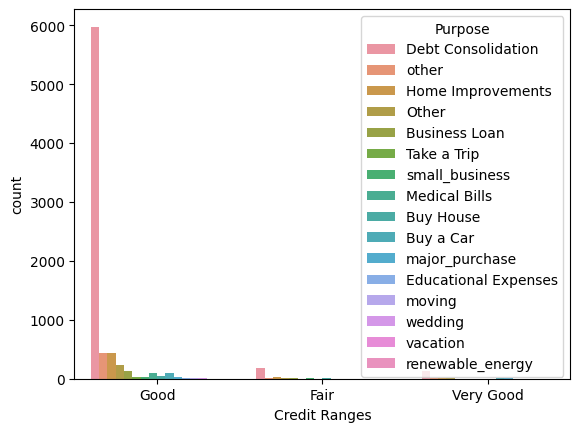

In [ ]:
sns.countplot(data=df,x='Credit Ranges',hue="Purpose")

In [ ]:
# Credit Score Column still  having Null values
# We'll fill Null values considering the "Maximum Open Credit" available for that particular cx.

cat_fair=df[df['Maximum Open Credit']<= 22164912]
cat_very_good = df[df['Maximum Open Credit'].between(22164912, 798255370)]
cat_good = df[df['Maximum Open Credit'].between(798255370, 1539737892)]

In [ ]:
# replacing NaN values of Credit Ranges colums

cat_fair["Credit Ranges"].replace(np.nan,"Fair",inplace=True)
cat_very_good["Credit Ranges"].replace(np.nan,"Good",inplace=True)
cat_good["Credit Ranges"].replace(np.nan,"Very Good",inplace=True)

# Replacing Nan values of Credit Score column

cat_fair["Credit Score"].fillna(random.randrange(500,650),inplace=True)
cat_very_good["Credit Score"].fillna(random.randrange(650,750),inplace=True)
cat_good["Credit Score"].fillna(random.randrange(750,850),inplace=True)

data = pd.concat([cat_fair,cat_very_good,cat_good])

In [ ]:
data['Annual Income'].mean()

1369106.0397805213

In [ ]:
data['Annual Income'].fillna('1378263.6',inplace=True)

In [ ]:
data['Years in current job'].value_counts()

10+ years    3085
2 years       916
3 years       866
< 1 year      795
5 years       696
1 year        648
4 years       613
6 years       566
7 years       554
8 years       472
9 years       362
Name: Years in current job, dtype: int64

In [ ]:
data['Years in current job']=df['Years in current job'].replace(['< 1 year','1 year','2 years','3 years','4 years',
                                                                 '5 years','6 years','7 years','8 years','9 years','10+ years'],[0.5,1,2,3,4,5,6,7,8,9,10])

In [ ]:
data['Years in current job'].fillna(10,inplace=True)

In [ ]:
# Segregate Categorical columsn and Numerical columns

Cat_col =[]
Num_col =[]

for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        Cat_col.append(i)
    else:
        Num_col.append(i)

In [ ]:
data['Years in current job'].isnull().sum()

0

<Axes: xlabel='Years in current job', ylabel='count'>

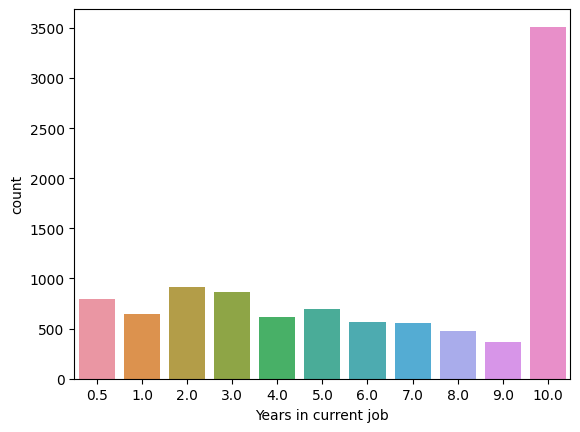

In [ ]:
sns.countplot(data=data,x='Years in current job')

In [ ]:
data['Home Ownership'].value_counts()

Home Mortgage    4867
Rent             4203
Own Home          914
HaveMortgage       16
Name: Home Ownership, dtype: int64

In [ ]:
data['Home Ownership'].replace('HaveMortgage','Home Mortgage',inplace=True)

In [ ]:
data['Months since last delinquent'].isnull().sum()

5306

In [ ]:
# almost 53% of the data is not available, hence the column is not useful. we'll drop the same.

data.drop(['Months since last delinquent'],axis =1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9539
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    10000 non-null  object 
 1   Customer ID                10000 non-null  object 
 2   Current Loan Amount        10000 non-null  float64
 3   Term                       10000 non-null  object 
 4   Credit Score               10000 non-null  float64
 5   Annual Income              10000 non-null  object 
 6   Years in current job       10000 non-null  float64
 7   Home Ownership             10000 non-null  object 
 8   Purpose                    10000 non-null  object 
 9   Monthly Debt               10000 non-null  float64
 10  Years of Credit History    10000 non-null  float64
 11  Number of Open Accounts    10000 non-null  float64
 12  Number of Credit Problems  10000 non-null  float64
 13  Current Credit Balance     10000 non-null  floa

In [ ]:
data.corr()

,Current Loan Amount,Credit Score,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.215016,-0.002652,-0.021565,0.021325,-0.002187,0.001213,0.000680,0.005136,-0.010768,0.019864
Credit Score,0.215016,1.000000,-0.002331,-0.028545,0.016532,-0.013119,-0.017086,-0.000289,0.002337,-0.010545,-0.004322
Years in current job,-0.002652,-0.002331,1.000000,0.092273,0.235996,0.030144,0.039291,0.074974,0.026431,0.064295,-0.011110
Monthly Debt,-0.021565,-0.028545,0.092273,1.000000,0.195138,0.418032,-0.037337,0.467230,0.171000,-0.083580,0.043536
Years of Credit History,0.021325,0.016532,0.235996,0.195138,1.000000,0.128324,0.076636,0.188845,0.106217,0.074185,0.034620
Number of Open Accounts,-0.002187,-0.013119,0.030144,0.418032,0.128324,1.000000,-0.008830,0.215287,0.142930,-0.015832,0.012512
Number of Credit Problems,0.001213,-0.017086,0.039291,-0.037337,0.076636,-0.008830,1.000000,-0.103506,-0.049869,0.741068,0.637336
Current Credit Balance,0.000680,-0.000289,0.074974,0.467230,0.188845,0.215287,-0.103506,1.000000,0.486389,-0.120100,-0.013359
Maximum Open Credit,0.005136,0.002337,0.026431,0.171000,0.106217,0.142930,-0.049869,0.486389,1.000000,-0.055799,-0.008414
Bankruptcies,-0.010768,-0.010545,0.064295,-0.083580,0.074185,-0.015832,0.741068,-0.120100,-0.055799,1.000000,0.071635


In [ ]:
Cat_col

['Loan ID',
 'Customer ID',
 'Term',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Credit Ranges']

In [ ]:
Num_col

['Current Loan Amount',
 'Credit Score',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

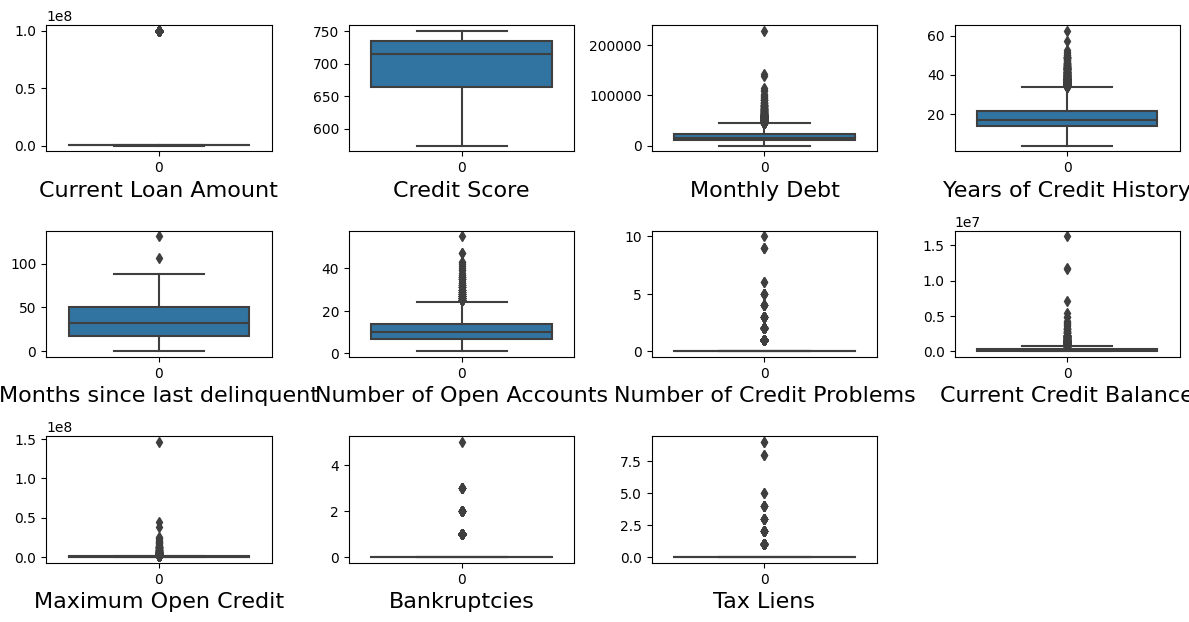

In [ ]:
# checking Outliers

plt.figure(figsize=(12,12))
pltn=1

for i in Num_col:
    if pltn<=15:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=16)
    pltn=pltn+1
plt.tight_layout()

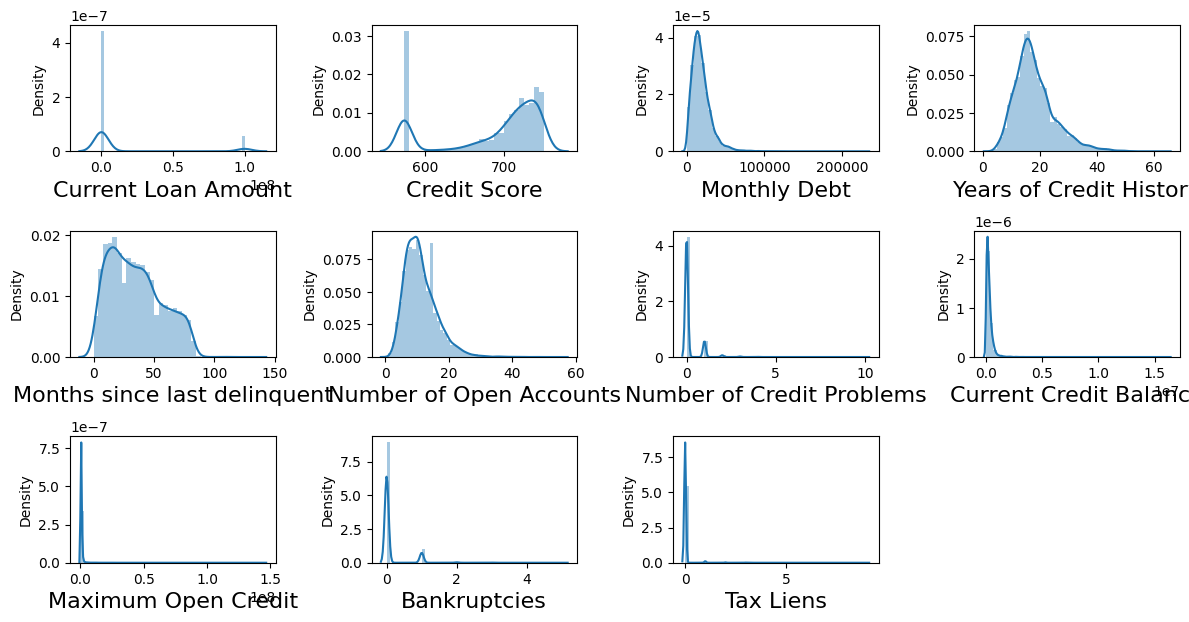

In [ ]:
plt.figure(figsize=(12,12))
pltn=1

for i in Num_col:
    if pltn<=15:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=16)
    pltn=pltn+1
plt.tight_layout()

In [ ]:
#standardization
from scipy.stats import zscore
z=np.abs(zscore(data[Num_col]))
new_data=data[(z<=3).all(axis=1)]

In [ ]:
new_data

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Ranges


In [ ]:
new_data.shape

(0, 19)

In [ ]:
data.shape

(10000, 19)

In [ ]:

import math

def calculate_angle(p1, p2, p3, p4):
    # Calculate vectors
    vector1 = [p2[0] - p1[0], p2[1] - p1[1], p2[2] - p1[2]]
    vector2 = [p3[0] - p1[0], p3[1] - p1[1], p3[2] - p1[2]]
    vector3 = [p4[0] - p1[0], p4[1] - p1[1], p4[2] - p1[2]]

    # Calculate dot product and cross product
    dot_product = vector2[0] * vector3[0] + vector2[1] * vector3[1] + vector2[2] * vector3[2]
    cross_product = [
        vector2[1] * vector3[2] - vector2[2] * vector3[1],
        vector2[2] * vector3[0] - vector2[0] * vector3[2],
        vector2[0] * vector3[1] - vector2[1] * vector3[0]
    ]

    # Calculate magnitude of vectors
    magnitude_vector2 = math.sqrt(vector2[0] ** 2 + vector2[1] ** 2 + vector2[2] ** 2)
    magnitude_vector3 = math.sqrt(vector3[0] ** 2 + vector3[1] ** 2 + vector3[2] ** 2)
    magnitude_cross_product = math.sqrt(cross_product[0] ** 2 + cross_product[1] ** 2 + cross_product[2] ** 2)

    # Calculate angle in degrees
    angle = math.degrees(math.acos(dot_product / (magnitude_vector2 * magnitude_vector3)))

    return round(angle, 2)

# Read input points
points = input("").split()
p1 = [float(points[0]), float(points[1]), float(points[2])]
p2 = [float(points[3]), float(points[4]), float(points[5])]
p3 = [float(points[6]), float(points[7]), float(points[8])]
p4 = [float(points[9]), float(points[10]), float(points[11])]

# Calculate and print the angle
angle = calculate_angle(p1, p2, p3, p4)
print("The angle between the plane formed by the points is:", angle, "degrees")

0 4 5 1 7 6 0 5 9 1 7 2
The angle between the plane formed by the points is: 120.05 degrees
